In [1]:
#installing libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency

In [10]:
#Loading the dataframe 

df = pd.read_csv('loan_data_2015.csv')

C:\Users\shree02\AppData\Local\Temp\ipykernel_22756\2771534297.py:3: DtypeWarning: Columns (19,47,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2015.csv')


In [27]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,60516983,64537751,20000,20000,20000,36 months,12.29,667.06,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,41000,NaN,NaN,NaN
1,60187139,64163931,11000,11000,11000,36 months,12.69,369.00,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,13100,NaN,NaN,NaN
2,60356453,64333218,7000,7000,7000,36 months,9.99,225.84,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,16300,NaN,NaN,NaN
3,59955769,63900496,10000,10000,10000,36 months,10.99,327.34,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,34750,NaN,NaN,NaN
4,58703693,62544456,9550,9550,9550,36 months,19.99,354.87,E,E4,...,NaN,NaN,NaN,NaN,NaN,NaN,14100,NaN,NaN,NaN


In [11]:
#here we will remove unique Identifiers from the data set
df.drop(columns = ['id', 'member_id', 'sub_grade', 'url', 'zip_code'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 69 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    421094 non-null  int64  
 1   funded_amnt                  421094 non-null  int64  
 2   funded_amnt_inv              421094 non-null  int64  
 3   term                         421094 non-null  object 
 4   int_rate                     421094 non-null  float64
 5   installment                  421094 non-null  float64
 6   grade                        421094 non-null  object 
 7   emp_title                    397220 non-null  object 
 8   emp_length                   397277 non-null  object 
 9   home_ownership               421094 non-null  object 
 10  annual_inc                   421094 non-null  float64
 11  verification_status          421094 non-null  object 
 12  issue_d                      421094 non-null  object 
 13 

In [12]:
#Now lets remove the columns with more than 80% null values

df.dropna(thresh = df.shape[0]*0.2, axis = 1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    421094 non-null  int64  
 1   funded_amnt                  421094 non-null  int64  
 2   funded_amnt_inv              421094 non-null  int64  
 3   term                         421094 non-null  object 
 4   int_rate                     421094 non-null  float64
 5   installment                  421094 non-null  float64
 6   grade                        421094 non-null  object 
 7   emp_title                    397220 non-null  object 
 8   emp_length                   397277 non-null  object 
 9   home_ownership               421094 non-null  object 
 10  annual_inc                   421094 non-null  float64
 11  verification_status          421094 non-null  object 
 12  issue_d                      421094 non-null  object 
 13 

In [13]:
# List of categorical columns with missing values
categorical_cols = ['emp_title', 'emp_length', 'last_credit_pull_d', 'last_pymnt_d','next_pymnt_d', 'title']

# Fill nulls with mode for each categorical column
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [14]:
# List of numerical columns
numerical_cols = ['mths_since_last_delinq', 'revol_util', 'mths_since_last_major_derog']

# Fill nulls with mean for each numerical column
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [7]:
#Hence we have No missing values in our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    421094 non-null  int64  
 1   funded_amnt                  421094 non-null  int64  
 2   funded_amnt_inv              421094 non-null  int64  
 3   term                         421094 non-null  object 
 4   int_rate                     421094 non-null  float64
 5   installment                  421094 non-null  float64
 6   grade                        421094 non-null  object 
 7   emp_title                    421094 non-null  object 
 8   emp_length                   421094 non-null  object 
 9   home_ownership               421094 non-null  object 
 10  annual_inc                   421094 non-null  float64
 11  verification_status          421094 non-null  object 
 12  issue_d                      421094 non-null  object 
 13 

In [15]:
#Segmentation of Loan Status into Two states (Default,No Default) . ['good_bad'] is the New Target Variable

df['good_bad']=np.where(df.loc[:,'loan_status'].isin(['Current','Issued','Late (31-120 days)','In Grace Period','Charged Off','Late (16-30 days)','Default']),0,1)
df.drop(columns = ['loan_status'],inplace=True)

[INFO] creating woe binning ...


C:\Users\shree02\anaconda3\Lib\site-packages\scorecardpy\condition_fun.py:34: UserWarning: There are 1 columns have only one unique values, which are removed from input dataset. 
 (ColumnNames: policy_code)
  warnings.warn("There are {} columns have only one unique values, which are removed from input dataset. \n (ColumnNames: {})".format(len(unique1_cols), ', '.join(unique1_cols)))
C:\Users\shree02\anaconda3\Lib\site-packages\scorecardpy\woebin.py:160: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dtm.loc[:,'bin'] = pd.cut(dtm['value'], bstbrks, right=False, labels=labels)
C:\Users\shree02\anaconda3\Lib\site-packages\scorecardpy\woebin.py:160: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always settin

Binning on 421094 rows and 47 columns in 00:03:39


C:\Users\shree02\anaconda3\Lib\site-packages\scorecardpy\woebin.py:1225: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots()


{'funded_amnt_inv': <Figure size 640x480 with 2 Axes>,
 'initial_list_status': <Figure size 640x480 with 2 Axes>,
 'grade': <Figure size 640x480 with 2 Axes>,
 'int_rate': <Figure size 640x480 with 2 Axes>,
 'total_rec_prncp': <Figure size 640x480 with 2 Axes>,
 'home_ownership': <Figure size 640x480 with 2 Axes>,
 'last_credit_pull_d': <Figure size 640x480 with 2 Axes>,
 'pymnt_plan': <Figure size 640x480 with 2 Axes>,
 'last_pymnt_amnt': <Figure size 640x480 with 2 Axes>,
 'recoveries': <Figure size 640x480 with 2 Axes>,
 'pub_rec': <Figure size 640x480 with 2 Axes>,
 'funded_amnt': <Figure size 640x480 with 2 Axes>,
 'mths_since_last_delinq': <Figure size 640x480 with 2 Axes>,
 'issue_d': <Figure size 640x480 with 2 Axes>,
 'revol_util': <Figure size 640x480 with 2 Axes>,
 'mths_since_last_major_derog': <Figure size 640x480 with 2 Axes>,
 'acc_now_delinq': <Figure size 640x480 with 2 Axes>,
 'loan_amnt': <Figure size 640x480 with 2 Axes>,
 'total_rec_int': <Figure size 640x480 with 

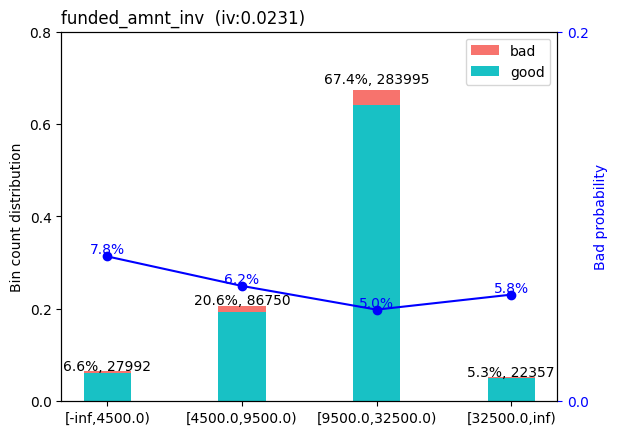

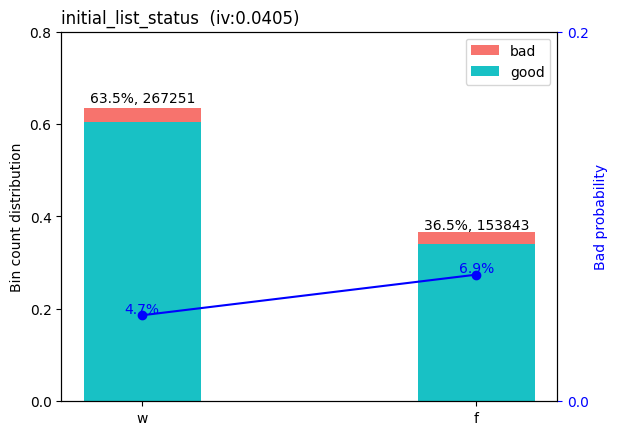

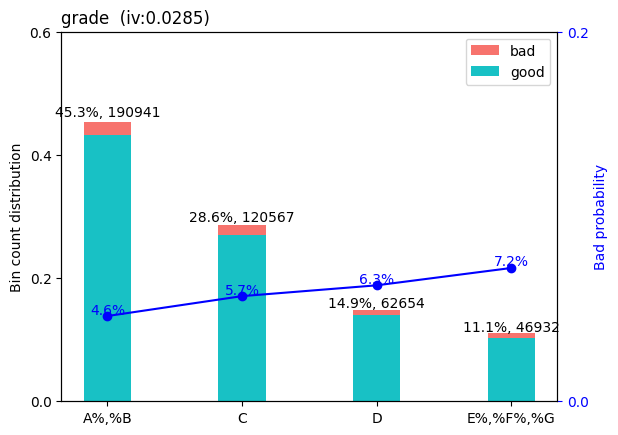

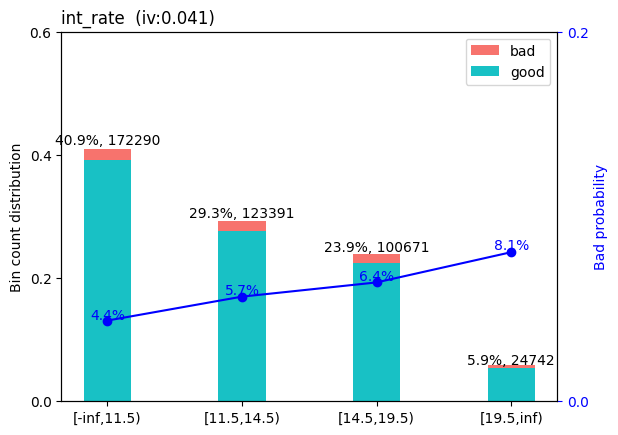

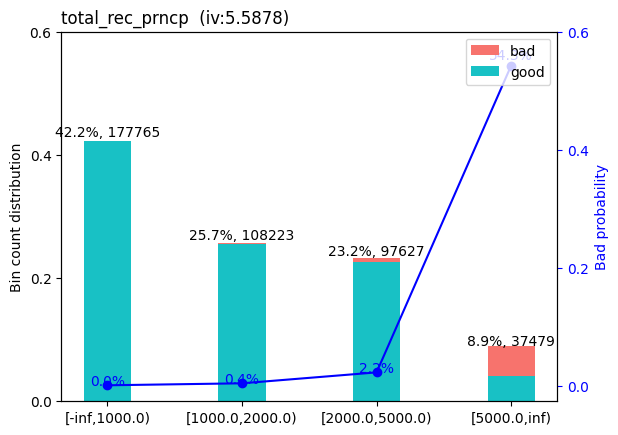

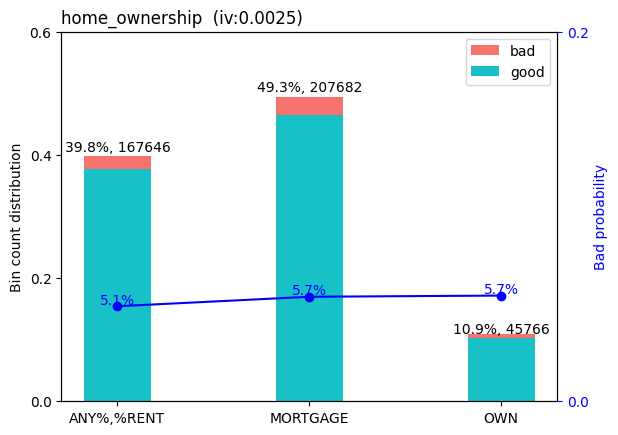

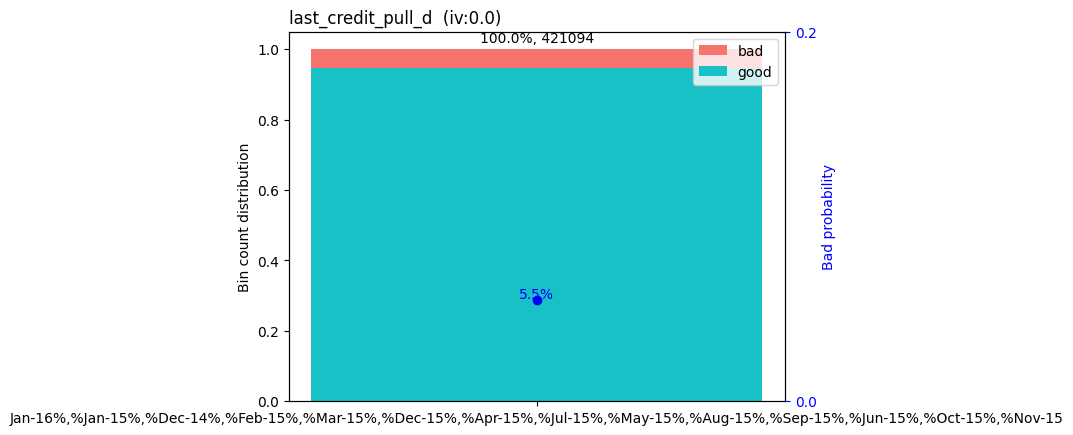

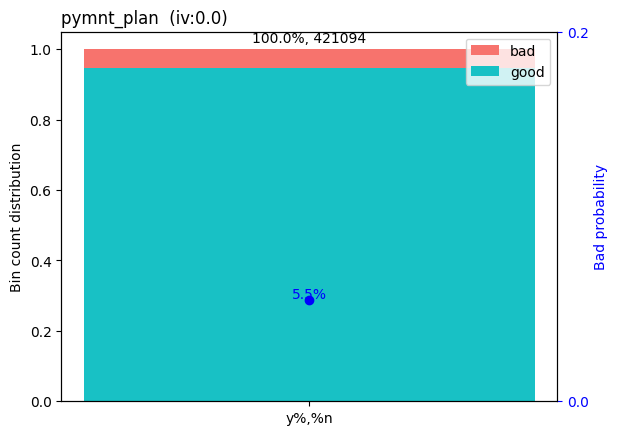

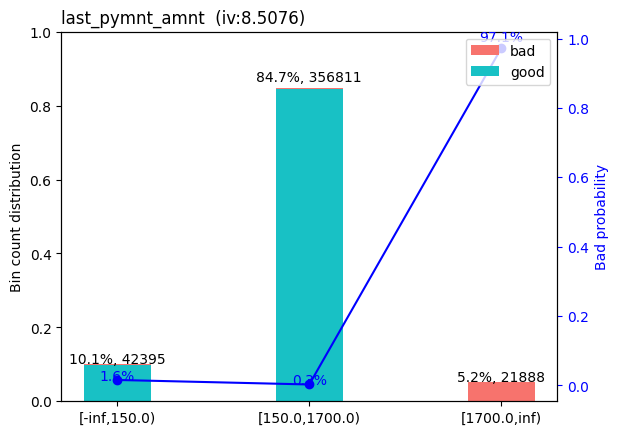

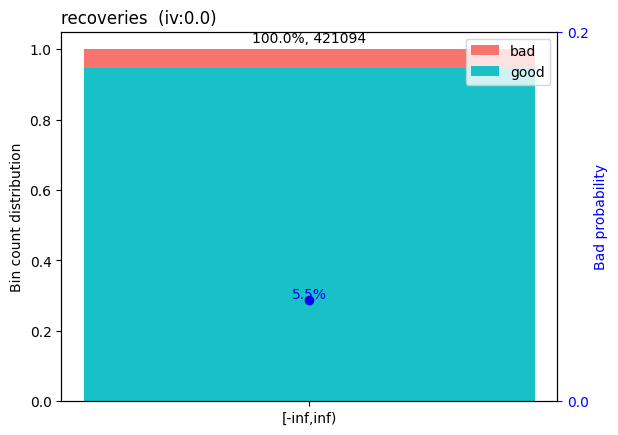

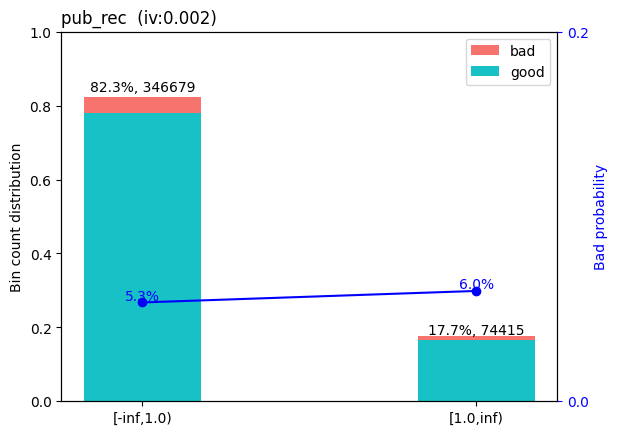

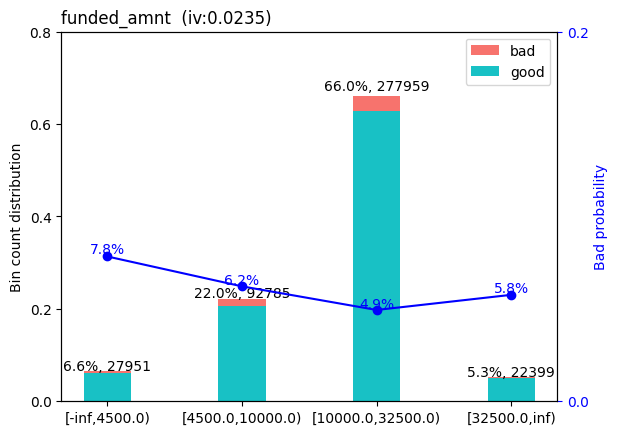

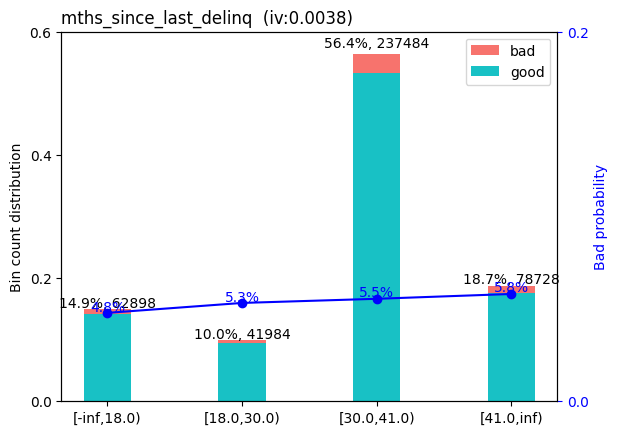

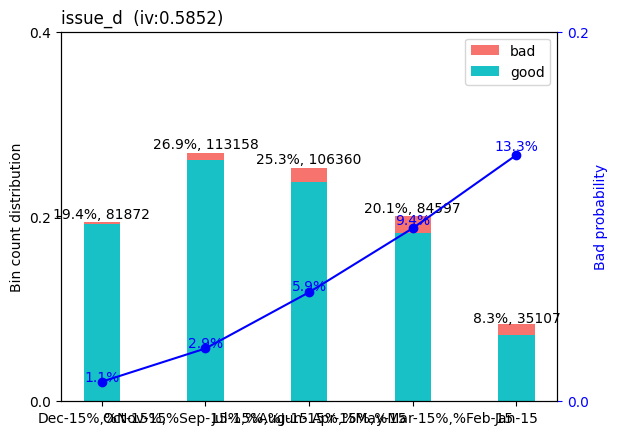

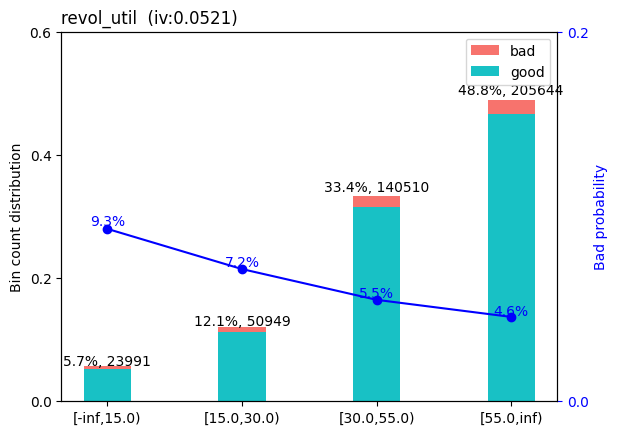

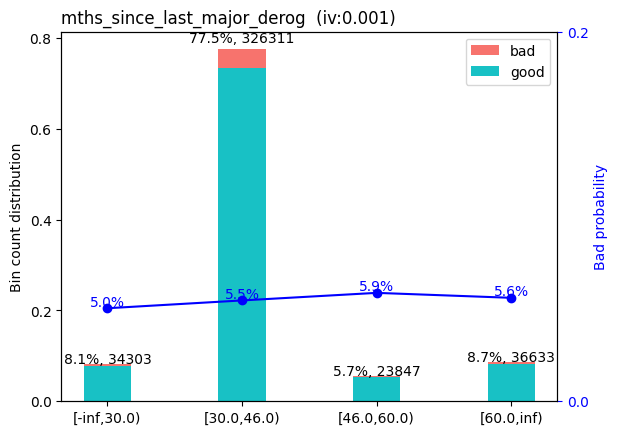

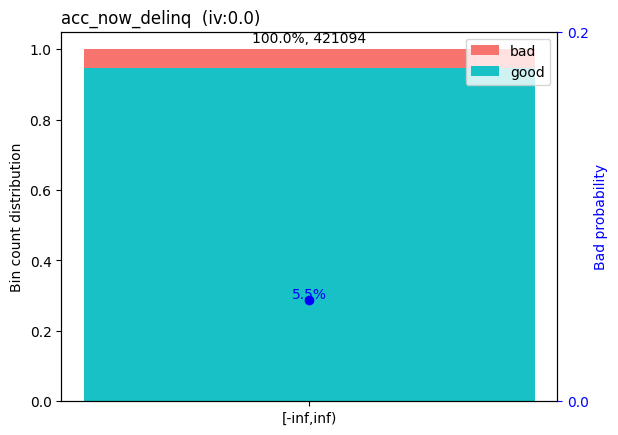

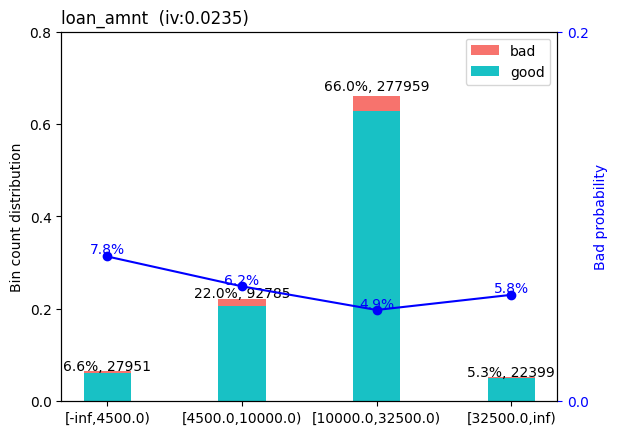

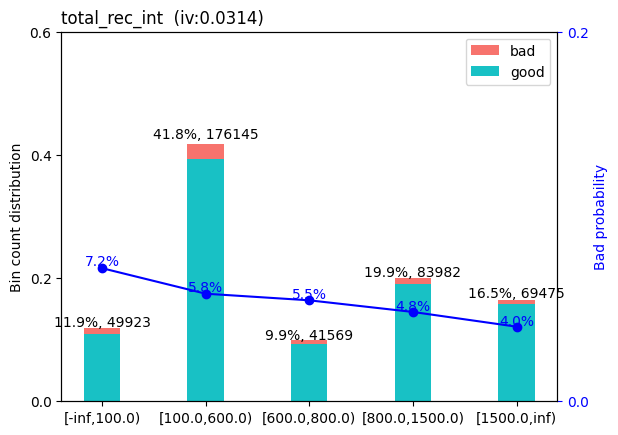

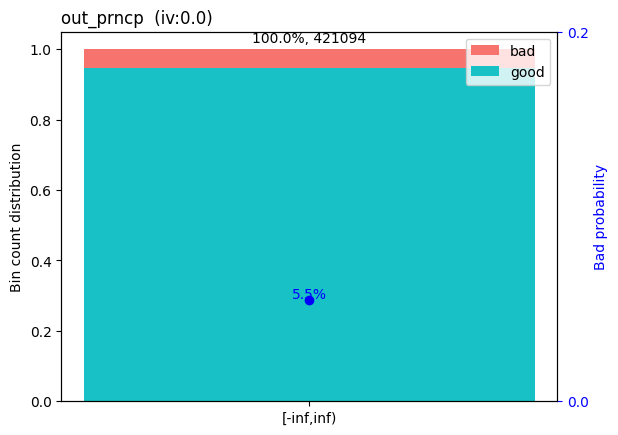

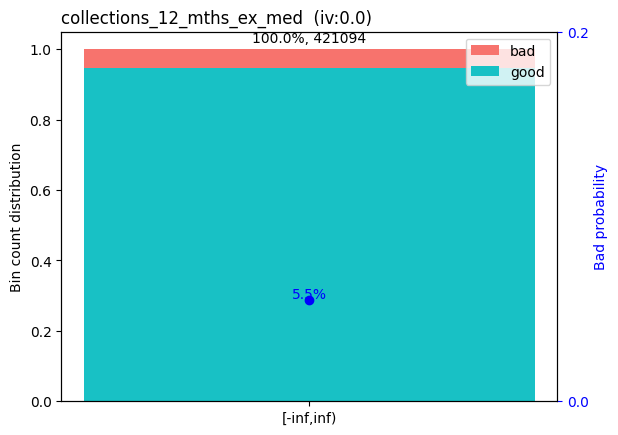

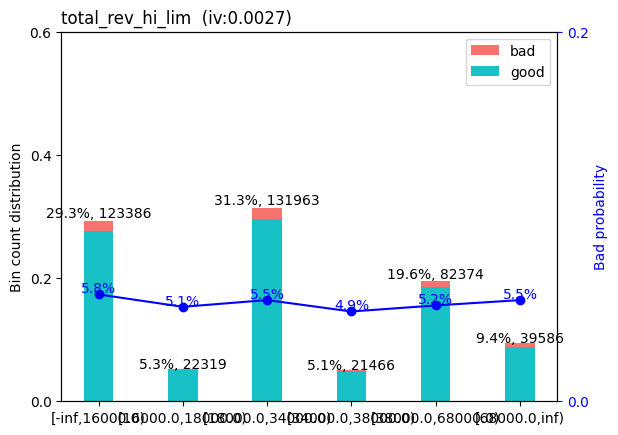

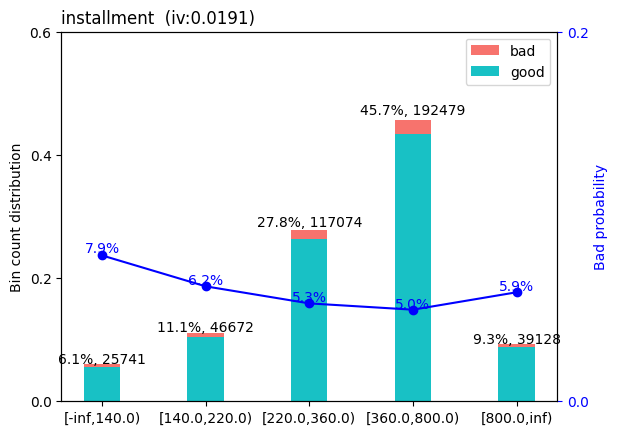

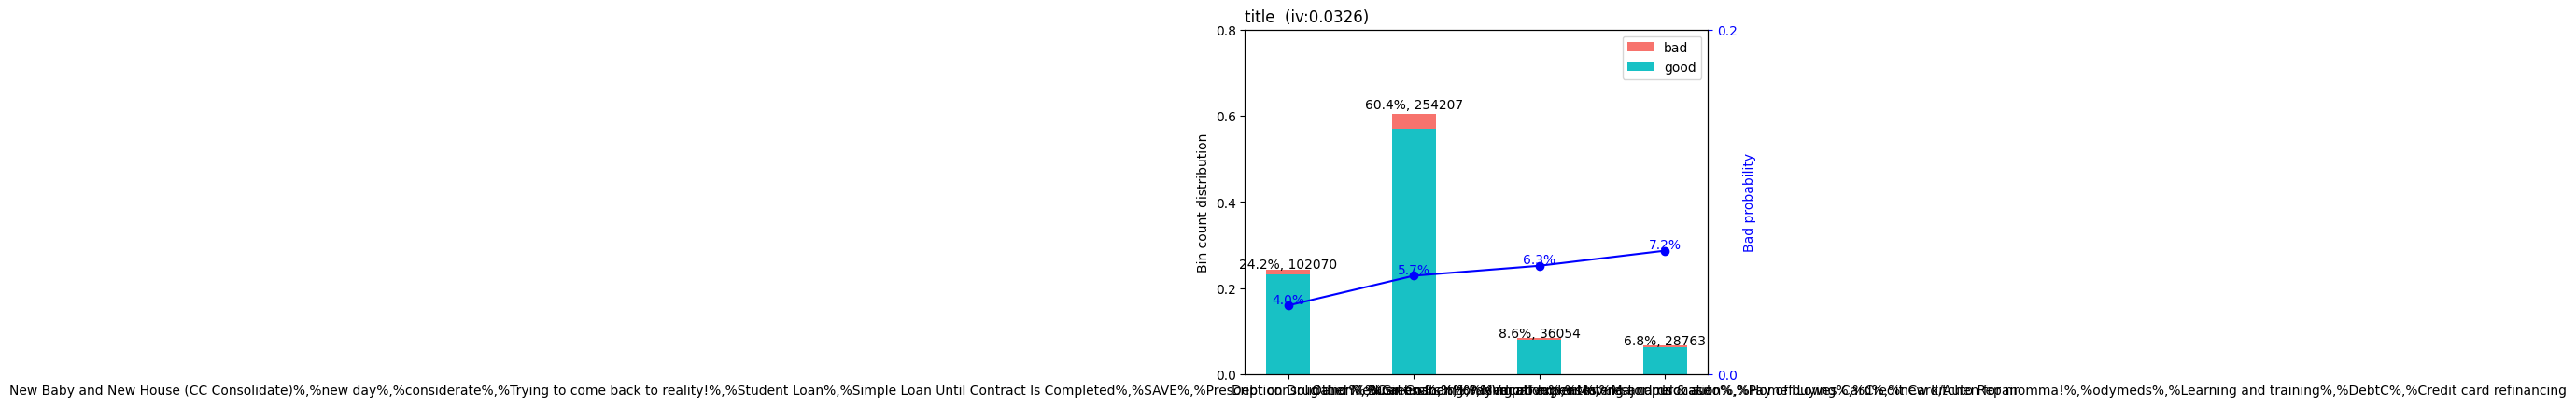

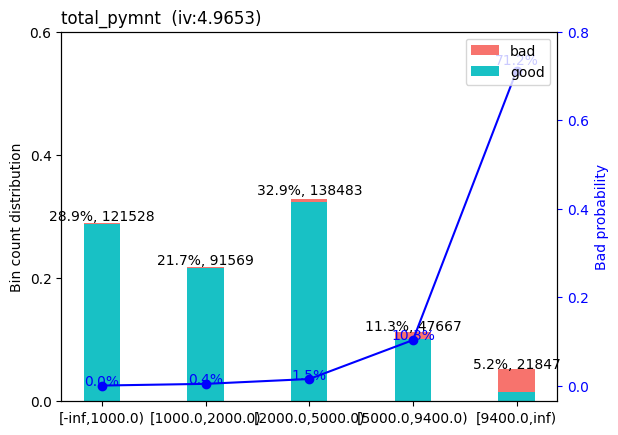

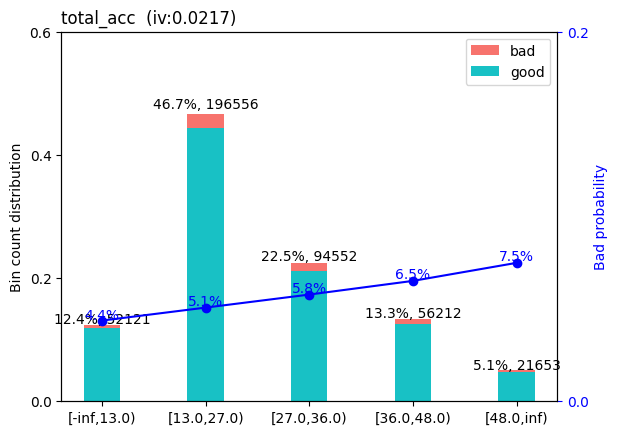

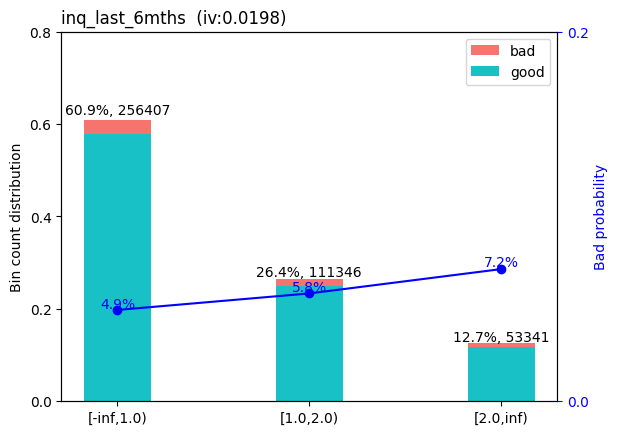

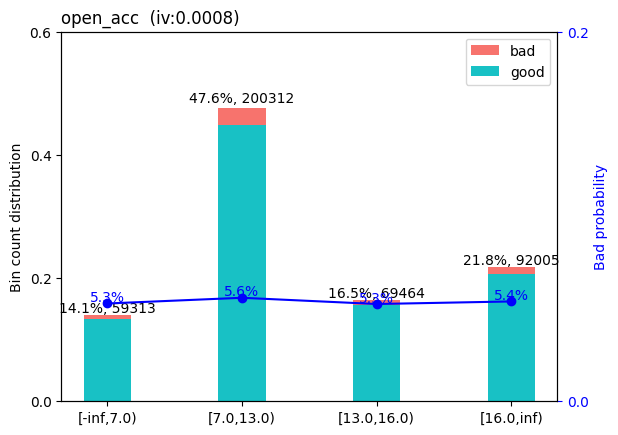

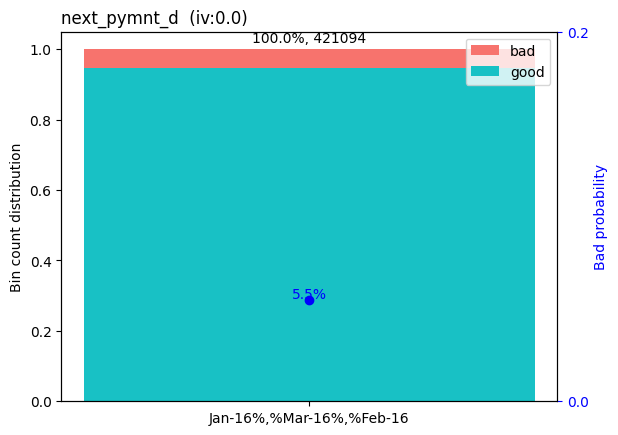

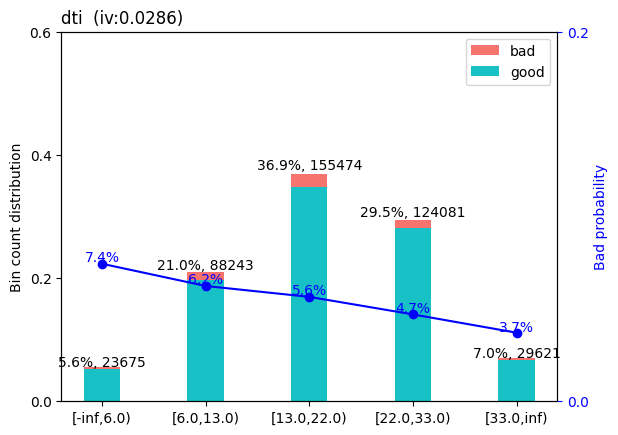

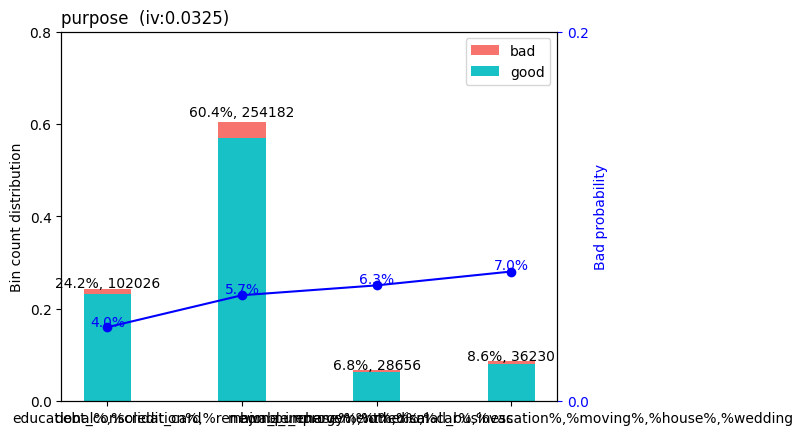

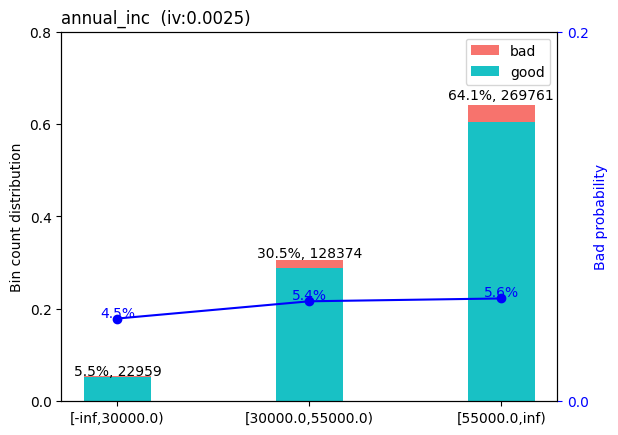

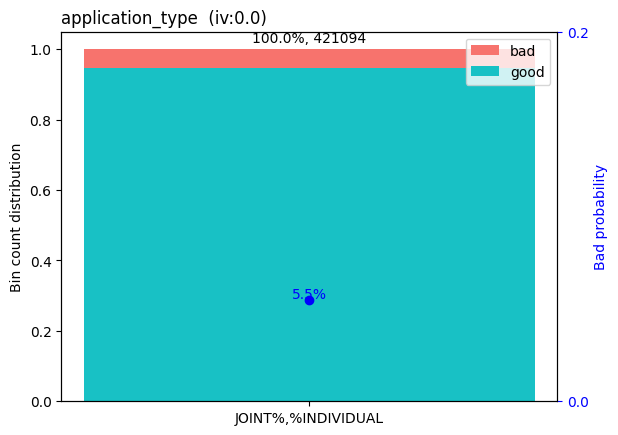

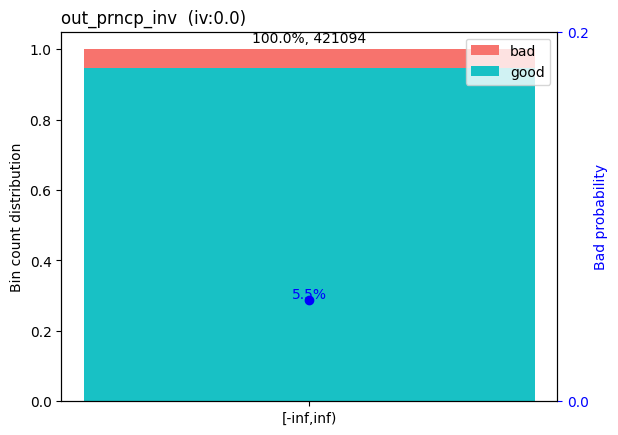

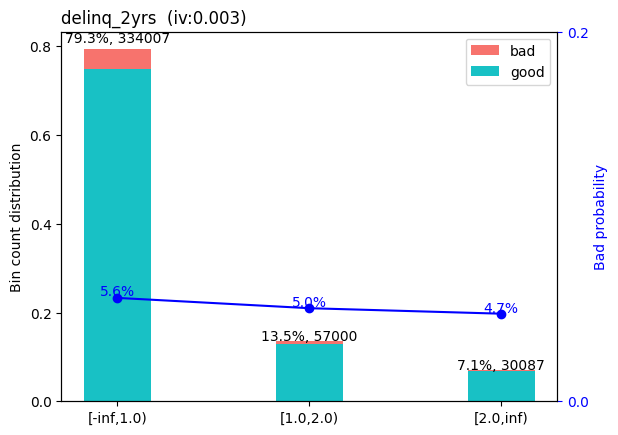

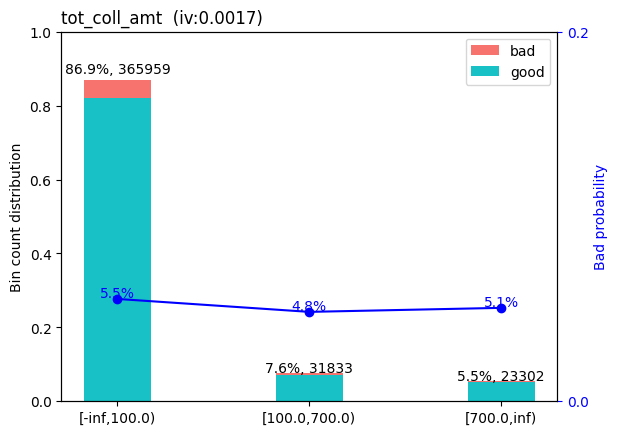

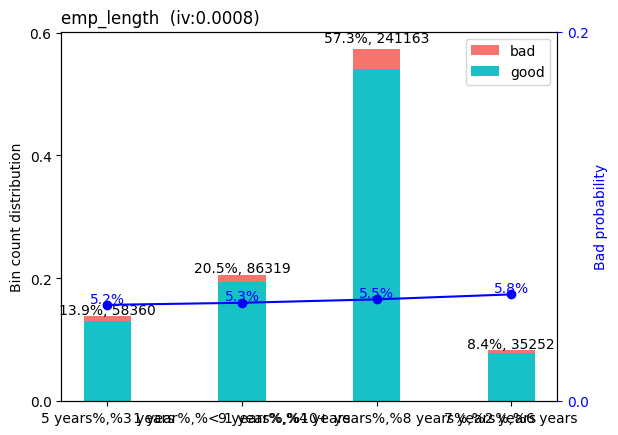

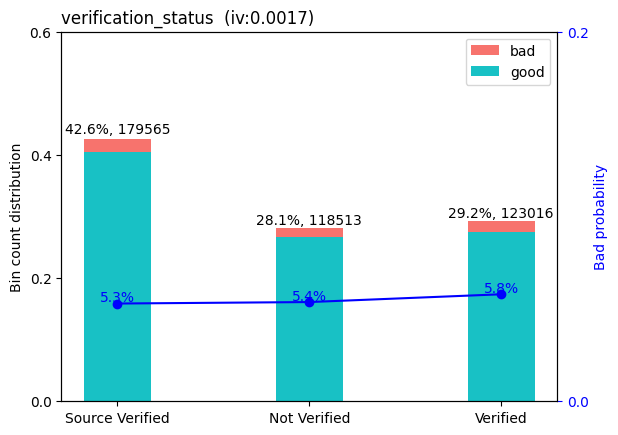

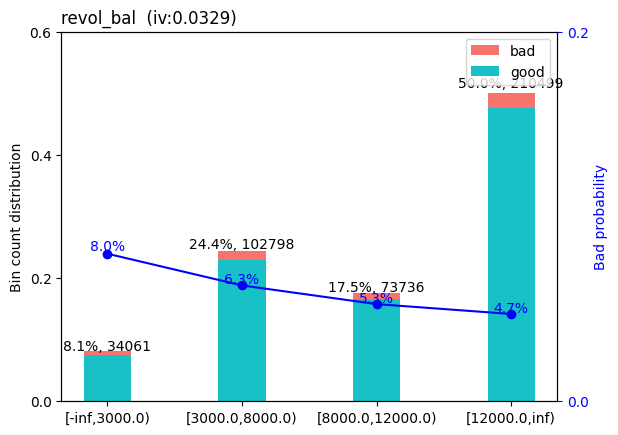

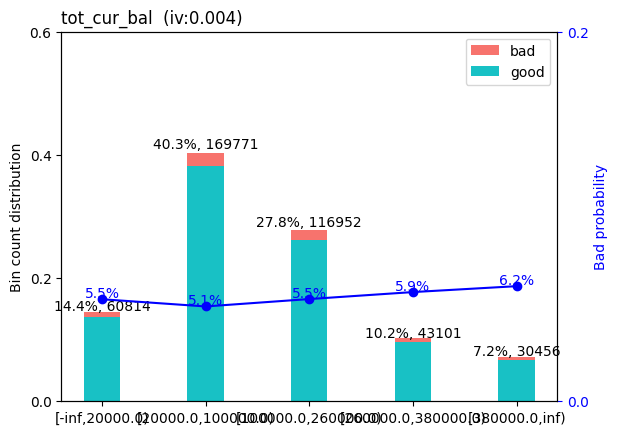

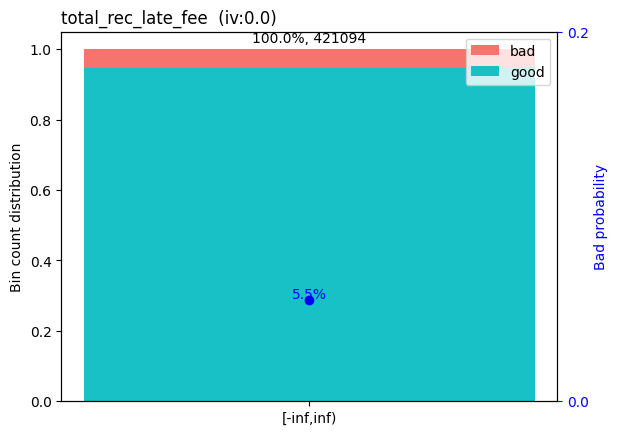

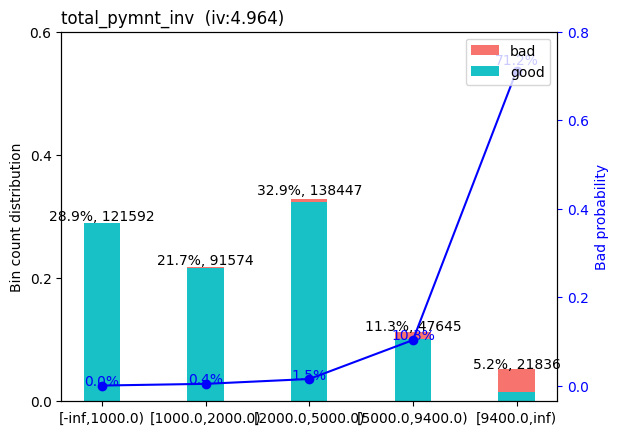

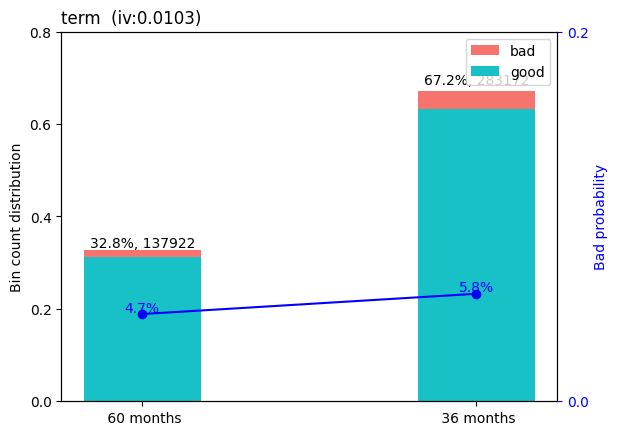

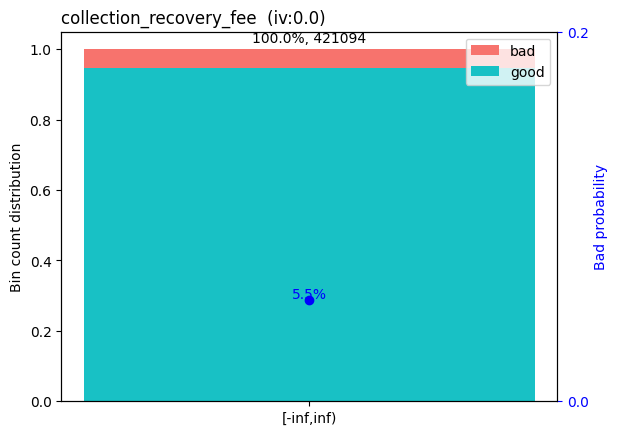

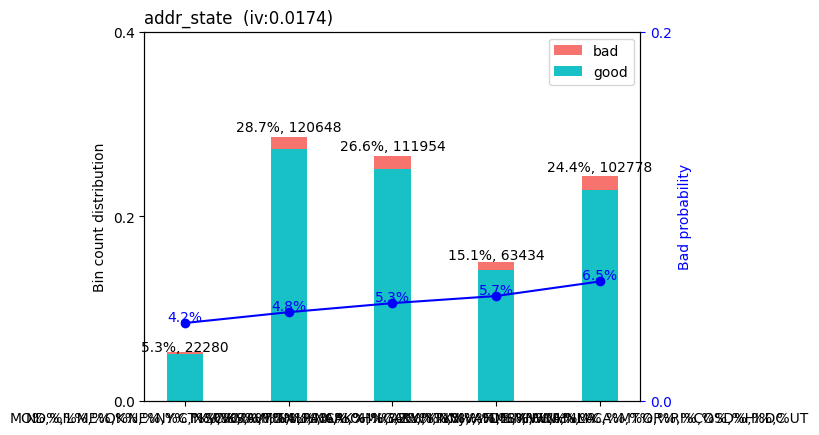

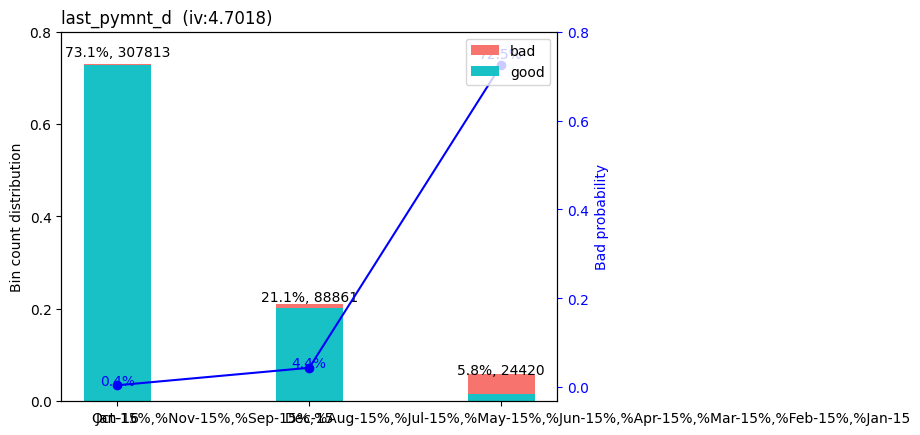

In [21]:
#Now we check weight of evidence for the Risk 

#There are 2 variables have too many unique non-numberic values, which might cause the binning process slow.(emp_title, earliest_cr_line)

df.drop(columns =['emp_title','earliest_cr_line'],inplace=True)

import scorecardpy as sc  #After Installing scorcardpy library
y = 'good_bad'
bins = sc.woebin(df,y)
sc.woebin_plot(bins)
b

In [16]:
# Function to find categorical variables with too many categories

def find_high_cardinality_categoricals(df, threshold=5):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    high_cardinality_cols = []

    for col in categorical_cols:
        unique_count = df[col].nunique()
        if unique_count > threshold:
            high_cardinality_cols.append((col, unique_count))
    
    return high_cardinality_cols

# Set your threshold for "too many" categories
threshold = 3  # You can adjust this value
high_cardinality_vars = find_high_cardinality_categoricals(df, threshold)

# Output the results
for col, count in high_cardinality_vars:
    print(f'Column: {col}, Unique Categories: {count}')

Column: grade, Unique Categories: 7
Column: emp_title, Unique Categories: 120811
Column: emp_length, Unique Categories: 11
Column: home_ownership, Unique Categories: 4
Column: issue_d, Unique Categories: 12
Column: purpose, Unique Categories: 14
Column: title, Unique Categories: 27
Column: addr_state, Unique Categories: 49
Column: earliest_cr_line, Unique Categories: 668
Column: last_pymnt_d, Unique Categories: 13
Column: last_credit_pull_d, Unique Categories: 14


In [17]:
#Deleting categorical columns with high cardinaltiy
df.drop(columns=['emp_title','earliest_cr_line'],inplace=True)

In [18]:
# Step 1: Identify categorical columns
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns

# Step 2: Initialize LabelEncoder
label_encoders = {}

# Step 3: Apply Label Encoding to each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for later use (e.g., inverse_transform)

In [19]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad
0,20000,20000,20000,0,12.29,667.06,2,0,2,65000.0,...,6,0,45.114741,1,0,0,0,52303,41000,0
1,11000,11000,11000,0,12.69,369.00,2,7,1,40000.0,...,6,0,79.000000,1,0,0,332,175731,13100,0
2,7000,7000,7000,0,9.99,225.84,1,6,1,32000.0,...,6,0,45.114741,1,0,0,0,202012,16300,0
3,10000,10000,10000,0,10.99,327.34,1,1,1,48000.0,...,6,0,45.114741,1,0,0,0,108235,34750,0
4,9550,9550,9550,0,19.99,354.87,4,1,3,32376.0,...,6,0,69.000000,1,0,0,0,45492,14100,0


In [20]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming df4 is already loaded and contains the columns you specified
X = df.drop(columns=['good_bad'])  # Features
y = df['good_bad']                 # Target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Get Feature Importance (Coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(log_reg.coef_[0])
}).sort_values(by='Importance', ascending=False)



print("Feature Importance:\n", feature_importance)

Model Accuracy: 99.95%
Feature Importance:
                         Feature  Importance
27                out_prncp_inv   16.695405
26                    out_prncp   16.695233
37                 next_pymnt_d    3.772178
36              last_pymnt_amnt    1.743152
2               funded_amnt_inv    1.492660
0                     loan_amnt    1.478059
1                   funded_amnt    1.478059
34      collection_recovery_fee    1.091659
30              total_rec_prncp    0.926229
33                   recoveries    0.862400
28                  total_pymnt    0.748452
29              total_pymnt_inv    0.747988
31                total_rec_int    0.381010
3                          term    0.248024
46             total_rev_hi_lim    0.186092
22                    revol_bal    0.174132
20                     open_acc    0.161676
16                          dti    0.157735
24                    total_acc    0.150823
35                 last_pymnt_d    0.143619
45                  tot_cur_bal 

C:\Users\shree02\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
#removing the variables with least or Zero Importance i.e ( 'addr_state','policy_code')

df.drop(columns=['addr_state','policy_code','inq_last_6mths','addr_state'],inplace=True)

In [22]:
# Standardize the features (important for Logistic Regression)

X = df.drop(columns=['good_bad'])  # Features
y = df['good_bad']                 # Target



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (optional but recommended)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Predict the probabilities of default (class "bad" = 1)
# The second column gives the probability of class "1" (bad loans)
prob_default = logreg.predict_proba(X_scaled)[:, 0]

# Add the probabilities of default to the original dataset
df['probability_of_default'] = prob_default

# Check the updated dataset with the new column
df.head()

C:\Users\shree02\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad,probability_of_default
0,20000,20000,20000,0,12.29,667.06,2,0,2,65000.0,...,6,0,45.114741,0,0,0,52303,41000,0,0.999948
1,11000,11000,11000,0,12.69,369.00,2,7,1,40000.0,...,6,0,79.000000,0,0,332,175731,13100,0,0.001011
2,7000,7000,7000,0,9.99,225.84,1,6,1,32000.0,...,6,0,45.114741,0,0,0,202012,16300,0,0.875960
3,10000,10000,10000,0,10.99,327.34,1,1,1,48000.0,...,6,0,45.114741,0,0,0,108235,34750,0,0.968886
4,9550,9550,9550,0,19.99,354.87,4,1,3,32376.0,...,6,0,69.000000,0,0,0,45492,14100,0,0.972968


C:\Users\shree02\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC-AUC Score: 0.9999


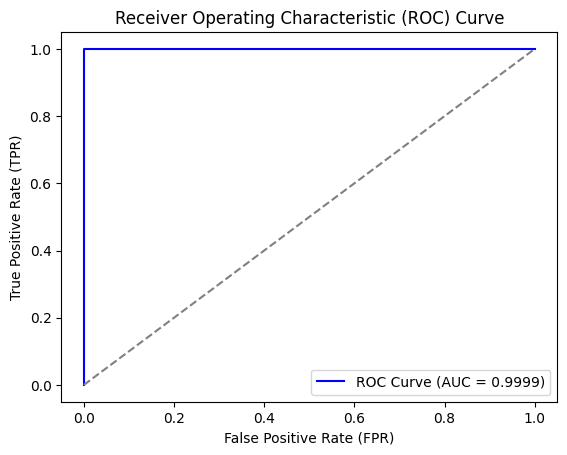

In [24]:
#ROC-AUC plot and scores

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assume df is your dataset with 'default' as the target column
# 1 indicates default, 0 indicates no default

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['good_bad','probability_of_default'])  # Drop the target column
y = df['good_bad']                 # Target column (1: default, 0: no default)

# Standardize the features (optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set (probabilities for both classes)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # We only need the probabilities for class 1 (default)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line representing random guess
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [25]:
#For calculating Exposure at Default (EAD)

df['EAD'] = df['tot_cur_bal']*df['int_rate']

#For calculating Loss (Loss)

df['Loss'] = df['EAD'] - df['recoveries']

#For calculating Loss Given Default (LGD)

df['LGD'] = df['Loss'] / df['EAD']

#For calculating Expected Loss

df['EL'] = df['probability_of_default']*df['LGD']*df['EAD']

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad,probability_of_default,EAD,Loss,LGD,EL
0,20000,20000,20000,0,12.29,667.06,2,0,2,65000.0,...,0,0,52303,41000,0,0.999948,642803.87,642803.87,1.0,6.427704e+05
1,11000,11000,11000,0,12.69,369.00,2,7,1,40000.0,...,0,332,175731,13100,0,0.001011,2230026.39,2230026.39,1.0,2.254623e+03
2,7000,7000,7000,0,9.99,225.84,1,6,1,32000.0,...,0,0,202012,16300,0,0.875960,2018099.88,2018099.88,1.0,1.767774e+06
3,10000,10000,10000,0,10.99,327.34,1,1,1,48000.0,...,0,0,108235,34750,0,0.968886,1189502.65,1189502.65,1.0,1.152493e+06
4,9550,9550,9550,0,19.99,354.87,4,1,3,32376.0,...,0,0,45492,14100,0,0.972968,909385.08,909385.08,1.0,8.848026e+05


In [26]:
log_odds = np.log(df['probability_of_default'] / (1 - df['probability_of_default']))
df['log_odds'] = log_odds
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad,probability_of_default,EAD,Loss,LGD,EL,log_odds
0,20000,20000,20000,0,12.29,667.06,2,0,2,65000.0,...,0,52303,41000,0,0.999948,642803.87,642803.87,1.0,6.427704e+05,9.862796
1,11000,11000,11000,0,12.69,369.00,2,7,1,40000.0,...,332,175731,13100,0,0.001011,2230026.39,2230026.39,1.0,2.254623e+03,-6.895774
2,7000,7000,7000,0,9.99,225.84,1,6,1,32000.0,...,0,202012,16300,0,0.875960,2018099.88,2018099.88,1.0,1.767774e+06,1.954713
3,10000,10000,10000,0,10.99,327.34,1,1,1,48000.0,...,0,108235,34750,0,0.968886,1189502.65,1189502.65,1.0,1.152493e+06,3.438505
4,9550,9550,9550,0,19.99,354.87,4,1,3,32376.0,...,0,45492,14100,0,0.972968,909385.08,909385.08,1.0,8.848026e+05,3.583333


In [37]:

df.drop(columns=['credit_score'],inplace=True)

# Define the scale_score function
def scale_score(log_odds, points0=600, odds0=47/50, pdo=20): #Where 0.94 is the default rate
    """Calculate a scaled score from log odds, inverting the scale for risk assessment."""
    return points0 - (log_odds - np.log(odds0)) / np.log(2) * pdo

# Calculate the scaled score using the defined function
scaled_score = scale_score(df['log_odds'], points0=600, odds0=47/50, pdo=20)

# Clip the scores to be within 300 and 850
scaled_score = np.clip(scaled_score, 300, 850)

# Assign the scaled scores to the DataFrame
df['credit_score'] = scaled_score

# Convert float column to integers (truncating)
df['credit_score'] = df['credit_score'].astype(int)

# Display the DataFrame
print(df)


        loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0           20000        20000            20000     0     12.29       667.06   
1           11000        11000            11000     0     12.69       369.00   
2            7000         7000             7000     0      9.99       225.84   
3           10000        10000            10000     0     10.99       327.34   
4            9550         9550             9550     0     19.99       354.87   
...           ...          ...              ...   ...       ...          ...   
421089      25000        25000            25000     0     20.99       941.75   
421090       5875         5875             5875     0     15.59       205.37   
421091      10000        10000            10000     1     23.99       287.63   
421092      19600        19600            19600     1     14.31       459.22   
421093      28000        28000            28000     0     15.59       978.74   

        grade  emp_length  home_ownersh

In [38]:
df.to_csv('credit_scores_final.csv', index=False)